# Znajdowanie wzorców w tekście

In [1]:
from time import time
import pandas as pd
import matplotlib.pyplot as plt

### Implementacja algorytmów wyszukiwania wzorców

#### Algorytm naiwny

In [2]:
def find_naive(T,P):
    result=[]
    for i in range (len(T)-len(P)+1):
        if T[i:i+len(P)]==P: result.append(i)
    return result

#### Automat skończony

Preprocessing

In [3]:
def transition_table(text, pattern):
    result=[]
    alphabet=list(set(text+pattern))
    for q in range(len(pattern)+1):
        result.append({})
        for a in alphabet:
            k=min(len(pattern)+1,q+2)
            while True:
                k-=1
                # [:k] - prefiks o długości k
                # [-k:] - sufiks o długości k
                if k==0 or pattern[:k] == (pattern[:q]+a)[-k:]:
                    break
            result[q][a]=k
    return result

Algorytm bez preprocessingu

In [4]:
def string_matching_FA(T, delta):
    result=[]
    q=0
    length=len(delta)-1
    for i in range(len(T)):
        q=delta[q][T[i]]
        if(q==length):
            result.append(i+1-q)
    return result

Algorytm z preprocessingiem

In [5]:
def find_FA(T,P):
    delta=transition_table(T,P)
    return string_matching_FA(T,delta)

#### Algorytm Knutha-Morrisa-Pratta

Preprocessing

In [6]:
def prefix_fun(pattern):
    pi=[0]
    k=0
    for q in range(1, len(pattern)):
        while(k>0 and pattern[k]!=pattern[q]):
            k=pi[k-1]
        if(pattern[k]==pattern[q]):
            k+=1
        pi.append(k)
    return pi

Algorytm bez preprocessingu

In [7]:
def string_matching_KMP(T, P, pi):
    result=[]
    q=0
    for i in range(len(T)):
        while(q>0 and P[q]!=T[i]):
            q=pi[q-1]
        if P[q]==T[i]:
            q+=1
        if q==len(P):
            result.append(i+1-q)
            q=pi[q-1]
    return result

Algorytm z preprocessingiem

In [8]:
def find_KMP(T,P):
    pi=prefix_fun(P)
    return string_matching_KMP(T,P,pi)

### Funkcje do mierzenia czasów i testów

In [9]:
def times_and_results(T,P):
    times={'naive':0, 'FA_preprocessing':0, 'FA_no_preprocessing':0, 'FA_with_preprocessing':0, 'KMP_preprocessing':0, 'KMP_no_preprocessing':0, 'KMP_with_preprocessing':0}
    results={'naive':None, 'FA':None, 'KMP': None}
    
    start=time()
    res=find_naive(T,P)
    end=time()
    times['naive']=end-start
    results['naive']=res
    
    start=time()
    res=find_FA(T,P)
    end=time()
    times['FA_with_preprocessing']=end-start
    results['FA']=res
    
    start=time()
    res=find_KMP(T,P)
    end=time()
    times['KMP_with_preprocessing']=end-start
    results['KMP']=res
    
    start=time()
    delta=transition_table(T,P)
    end=time()
    times['FA_preprocessing']=end-start
    
    start=time()
    res=string_matching_FA(T,delta)
    end=time()
    times['FA_no_preprocessing']=end-start
    
    start=time()
    pi=prefix_fun(P)
    end=time()
    times['KMP_preprocessing']=end-start
    
    start=time()
    res=string_matching_KMP(T,P, pi)
    end=time()
    times['KMP_no_preprocessing']=end-start
    
    return results, times

In [10]:
def reorganise_times_dict(given):
    times=dict()
    for key in given[0].keys():
        times[key]=[]
        for i in range(len(given)):
            times[key].append(given[i][key])
        times[key].append(sum(times[key])/len(times[key]))
        times[key].append(min(times[key]))
        times[key].append(max(times[key]))
    return times

In [11]:
def return_data_frame(T,P, n):
    times=[]
    for i in range (n):
        times.append(times_and_results(T,P)[1])
    times=reorganise_times_dict(times)
    ixs=["pom. "+str(i) for i in range(n)]
    ixs.extend(["średni", "min", "max"])
    data={'czas': ixs,
    'naiwny: preprocessing':[0 for _ in range(n+3)],
      'AS: preprocessing': times['FA_preprocessing'],
      'KMP: preprocessing': times['KMP_preprocessing'],
     'naiwny: bez preprocessingu':times['naive'],
      'AS: bez preprocessingu': times['FA_no_preprocessing'],
      'KMP: bez preprocessingu': times['KMP_no_preprocessing'],
     'naiwny: w sumie':times['naive'],
      'AS: w sumie': times['FA_with_preprocessing'],
      'KMP: w sumie': times['KMP_with_preprocessing']}
    return data

### Testy porównujące szybkość działania algorytmów

In [12]:
T1="ababba"*100000
P1="aba"
data1=return_data_frame(T1,P1, 5)
data_frame1=pd.DataFrame(data1)
print("Tekst: ababba*100000")
print("Wzorzec: ", P1)
t1=data_frame1.style.set_caption("Czasy wyszukiwania wzorca w sek.")
display(t1)

Tekst: ababba*100000
Wzorzec:  aba


,czas,naiwny: preprocessing,AS: preprocessing,KMP: preprocessing,naiwny: bez preprocessingu,AS: bez preprocessingu,KMP: bez preprocessingu,naiwny: w sumie,AS: w sumie,KMP: w sumie
0,pom. 0,0,0.010453,0.000000,0.120820,0.049254,0.148847,0.120820,0.060177,0.138469
1,pom. 1,0,0.000000,0.000000,0.110791,0.066280,0.136458,0.110791,0.061188,0.149441
2,pom. 2,0,0.010191,0.000000,0.112845,0.062166,0.156412,0.112845,0.066125,0.148511
3,pom. 3,0,0.010317,0.000000,0.106410,0.053578,0.137901,0.106410,0.055677,0.142207
4,pom. 4,0,0.007849,0.000000,0.099608,0.060181,0.154516,0.099608,0.058720,0.146282
5,średni,0,0.007762,0.000000,0.110095,0.058292,0.146827,0.110095,0.060377,0.144982
6,min,0,0.000000,0.000000,0.099608,0.049254,0.136458,0.099608,0.055677,0.138469
7,max,0,0.010453,0.000000,0.120820,0.066280,0.156412,0.120820,0.066125,0.149441


In [13]:
T2="ghjjfejwavbaewvvewkvgfwajaeio;erhberghjjfejwavbaewvvewkvhjalbwbeahlweghjjfejwavbaewvvewkjhkgewvkghevffffffffffffffffgaaaaaasdkhggggggggggggggggggggggeagiweyrtfaglafcvsvzx,dncfgaefjsteuawor"
P2="ghjjfejwavbaewvvewkv"
data2=return_data_frame(T2,P2, 5)
data_frame2=pd.DataFrame(data2)
print("Tekst: ", T2)
print("Wzorzec: ", P2)
t1=data_frame2.style.set_caption("Czasy wyszukiwania wzorca w sek.")
display(t1)

Tekst:  ghjjfejwavbaewvvewkvgfwajaeio;erhberghjjfejwavbaewvvewkvhjalbwbeahlweghjjfejwavbaewvvewkjhkgewvkghevffffffffffffffffgaaaaaasdkhggggggggggggggggggggggeagiweyrtfaglafcvsvzx,dncfgaefjsteuawor
Wzorzec:  ghjjfejwavbaewvvewkv


,czas,naiwny: preprocessing,AS: preprocessing,KMP: preprocessing,naiwny: bez preprocessingu,AS: bez preprocessingu,KMP: bez preprocessingu,naiwny: w sumie,AS: w sumie,KMP: w sumie
0,pom. 0,0,0.009165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000518,0.000000
1,pom. 1,0,0.008068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,pom. 2,0,0.008013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,pom. 3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,pom. 4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009279,0.000000
5,średni,0,0.005049,0.000000,0.000000,0.000000,0.000000,0.000000,0.001959,0.000000
6,min,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,max,0,0.009165,0.000000,0.000000,0.000000,0.000000,0.000000,0.009279,0.000000


### Zliczenie wzorców "pan" i "pani" w pliku pan-tadeusz.txt

In [14]:
with open('pan-tadeusz.txt', 'r',encoding='UTF-8') as file:
    T = file.read()

In [15]:
results_pan, times_pan=times_and_results(T,'pan')
results_pani, times_pani=times_and_results(T,'pani')

In [16]:
print("Wyszukiwanie wzorca 'pan':")
print("Algorytm naiwny: ", len(results_pan['naive']))
print("Automat skończony: ", len(results_pan['FA']))
print("Algorytm KMP: ", len(results_pan['KMP']))
if(len(results_pan['naive'])==len(results_pan['FA'])==len(results_pan['KMP'])):
    print("Każdy algorytm zwrócił tyle samo dopasowań!")
else:
    print("Oj! Algorytmy nie zwróciły tej samej liczby dopasowań!")

if(sorted(results_pani['naive'])==sorted(results_pani['FA'])==sorted(results_pani['KMP'])):
    print("Zwrócone dopasowania są takie same!")
    
print("\nWyszukiwanie wzorca 'pani':")
print("Algorytm naiwny: ", len(results_pani['naive']))
print("Automat skończony: ", len(results_pani['FA']))
print("Algorytm KMP: ", len(results_pani['KMP']))
if(len(results_pani['naive'])==len(results_pani['FA'])==len(results_pani['KMP'])):
    print("Każdy algorytm zwrócił tyle samo dopasowań!")
else:
    print("Oj! Algorytmy nie zwróciły tej samej liczby dopasowań!")

if(sorted(results_pani['naive'])==sorted(results_pani['FA'])==sorted(results_pani['KMP'])):
    print("Zwrócone dopasowania są takie same!")

Wyszukiwanie wzorca 'pan':
Algorytm naiwny:  401
Automat skończony:  401
Algorytm KMP:  401
Każdy algorytm zwrócił tyle samo dopasowań!
Zwrócone dopasowania są takie same!

Wyszukiwanie wzorca 'pani':
Algorytm naiwny:  100
Automat skończony:  100
Algorytm KMP:  100
Każdy algorytm zwrócił tyle samo dopasowań!
Zwrócone dopasowania są takie same!


### Pomiary czasów

#### Tabelki i wykresy

In [29]:
data_pan=return_data_frame(T,"pan", 10)
data_pani=return_data_frame(T,"pani", 10)

In [30]:
df1=pd.DataFrame(data_pan)
table1=df1.style.set_caption("Czasy wyszukiwania wzorca 'pan' w sek.")
display(table1)

,czas,naiwny: preprocessing,AS: preprocessing,KMP: preprocessing,naiwny: bez preprocessingu,AS: bez preprocessingu,KMP: bez preprocessingu,naiwny: w sumie,AS: w sumie,KMP: w sumie
0,pom. 0,0,0.026967,0.000000,0.272228,0.122424,0.213098,0.272228,0.145173,0.205143
1,pom. 1,0,0.024214,0.000000,0.256489,0.129960,0.216509,0.256489,0.149434,0.214365
2,pom. 2,0,0.025116,0.000000,0.262002,0.128919,0.201473,0.262002,0.155937,0.200013
3,pom. 3,0,0.020793,0.000000,0.277511,0.128336,0.199175,0.277511,0.143135,0.209675
4,pom. 4,0,0.020674,0.000000,0.269818,0.124505,0.218215,0.269818,0.146679,0.207277
5,pom. 5,0,0.016020,0.000000,0.290059,0.129181,0.204400,0.290059,0.156012,0.208109
6,pom. 6,0,0.024853,0.000000,0.267602,0.122803,0.195464,0.267602,0.151318,0.200159
7,pom. 7,0,0.025141,0.000000,0.263125,0.128343,0.222244,0.263125,0.151863,0.208288
8,pom. 8,0,0.023992,0.000000,0.249682,0.119034,0.210793,0.249682,0.148804,0.202338
9,pom. 9,0,0.024814,0.000000,0.271085,0.125169,0.205958,0.271085,0.152086,0.201324


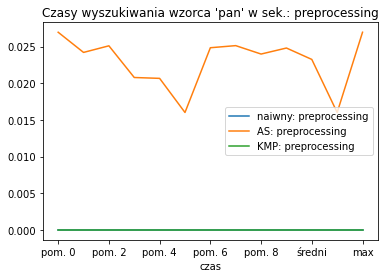

In [31]:
df1.plot(x='czas', y=['naiwny: preprocessing', 'AS: preprocessing', 'KMP: preprocessing'], kind='line')
plt.title("Czasy wyszukiwania wzorca 'pan' w sek.: preprocessing")
plt.show()

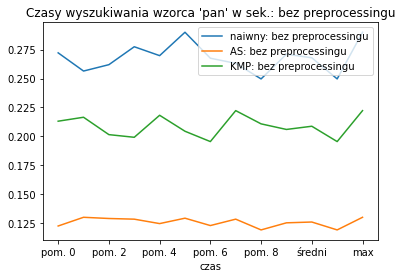

In [32]:
df1.plot(x='czas', y=['naiwny: bez preprocessingu', 'AS: bez preprocessingu', 'KMP: bez preprocessingu'], kind='line')
plt.title("Czasy wyszukiwania wzorca 'pan' w sek.: bez preprocessingu")
plt.show()

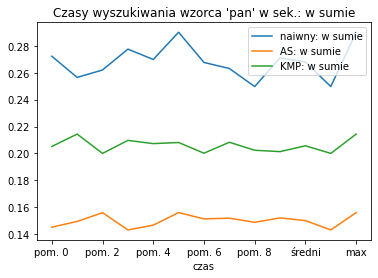

In [33]:
df1.plot(x='czas', y=['naiwny: w sumie', 'AS: w sumie', 'KMP: w sumie'], kind='line')
plt.title("Czasy wyszukiwania wzorca 'pan' w sek.: w sumie")
plt.show()

In [34]:
df2=pd.DataFrame(data_pani)
table2=df2.style.set_caption("Czasy wyszukiwania wzorca 'pani' w sek.")
display(table2)

,czas,naiwny: preprocessing,AS: preprocessing,KMP: preprocessing,naiwny: bez preprocessingu,AS: bez preprocessingu,KMP: bez preprocessingu,naiwny: w sumie,AS: w sumie,KMP: w sumie
0,pom. 0,0,0.017205,0.000000,0.267474,0.123469,0.200155,0.267474,0.149330,0.206024
1,pom. 1,0,0.027119,0.000000,0.257894,0.139193,0.218006,0.257894,0.154858,0.197141
2,pom. 2,0,0.024757,0.000000,0.265192,0.125210,0.203788,0.265192,0.147837,0.198620
3,pom. 3,0,0.022604,0.000000,0.290821,0.130450,0.199325,0.290821,0.149429,0.206744
4,pom. 4,0,0.029078,0.000000,0.273018,0.121876,0.197768,0.273018,0.157362,0.202749
5,pom. 5,0,0.027198,0.000000,0.274176,0.142587,0.200730,0.274176,0.149065,0.209295
6,pom. 6,0,0.016043,0.000000,0.287938,0.132864,0.218734,0.287938,0.149783,0.200074
7,pom. 7,0,0.024139,0.000000,0.257261,0.122403,0.207922,0.257261,0.155280,0.199798
8,pom. 8,0,0.024410,0.000000,0.259443,0.127249,0.209290,0.259443,0.152993,0.213976
9,pom. 9,0,0.020581,0.000000,0.265790,0.133327,0.203220,0.265790,0.148701,0.207409


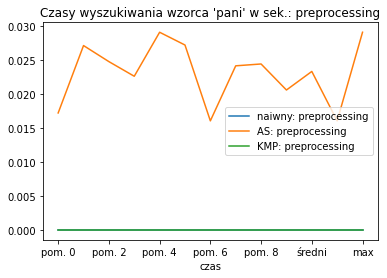

In [35]:
df2.plot(x='czas', y=['naiwny: preprocessing', 'AS: preprocessing', 'KMP: preprocessing'], kind='line')
plt.title("Czasy wyszukiwania wzorca 'pani' w sek.: preprocessing")
plt.show()

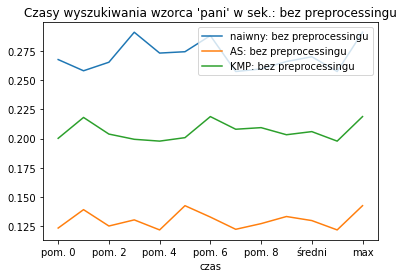

In [36]:
df2.plot(x='czas', y=['naiwny: bez preprocessingu', 'AS: bez preprocessingu', 'KMP: bez preprocessingu'], kind='line')
plt.title("Czasy wyszukiwania wzorca 'pani' w sek.: bez preprocessingu")
plt.show()

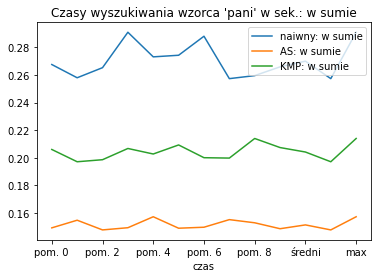

In [37]:
df2.plot(x='czas', y=['naiwny: w sumie', 'AS: w sumie', 'KMP: w sumie'], kind='line')
plt.title("Czasy wyszukiwania wzorca 'pani' w sek.: w sumie")
plt.show()

### Znaczne różnice między czasem algorytmu naiwnego i pozostałych

In [38]:
text = "a" * 1000000
pattern = "a" * 100000

In [39]:
results, times=times_and_results(text, pattern)

In [40]:
print("Tekst: 'a'*10^6")
print("Wzór: 'a'*10^5")
print("Czasy w sekundach:")
print("Algorytm naiwny: ",times['naive'])
print("Automat skończony: ",times['FA_no_preprocessing'])
print("Algorytm KMP",times['KMP_no_preprocessing'])
if(times['naive']>=times['FA_no_preprocessing']*5 and times['naive']>=times['KMP_no_preprocessing']*5):
    print("Algorytm naiwny jest wolniejszy ponad 5 razy!")

Tekst: 'a'*10^6
Wzór: 'a'*10^5
Czasy w sekundach:
Algorytm naiwny:  27.759644031524658
Automat skończony:  0.6476118564605713
Algorytm KMP 1.4273996353149414
Algorytm naiwny jest wolniejszy ponad 5 razy!


### Wnioski

* Wszystkie algorytmy zwróciły takie same wyniki w ramach testów.

* Najwolniejszym algorytmem okazał się zgodnie z złożonością obliczeniową algorytm naiwny.

* Najszybszym algorytmem okazał się algorytm wykorzystujący automat skończony. Warto jednak zaznaczyć, że czas preprocessingu w algorytmie wykorzystującym automat skończony rożnie proporcjonalnie do długości wzorca i ilości znaków w alfabecie. Czas preprocessingu w algorytmie KMP jest niezależny od alfabetu.

* Czas preprocessingu w algorytmie wykorzystującym automat skończony był dłuższy niż w algorytmie KMP.

* Z przeprowadzonych eksperymentów można wysunąć wniosek, że algorytm naiwny jest zdecydowanie gorszą opcją niż pozostałe algorytmy. W skrajnych przypadkacg algorytm naiwny może być wielokrotnie wolniejszy. 

* Algorytm należy dobrać do specyficznych warunków zadania i charakteru danych.